
<div style="border:solid green 2px; padding: 20px">

👋 **Hello! I'm Dot, your AI reviewer.**

I've completed the first pass of your code review. Below, you'll find my comments and suggestions for improvement.

**What should you do next?**

1. **Review:** check my comments in the notebook below.
2. **Decide:**
* **Agree with the feedback?** Great! Update your code accordingly.
* **Disagree or think it's a mistake?** No problem! You can keep your code exactly as it is.


3. **Resubmit:** Send your project back. **Your next iteration will be reviewed by a human expert**, whether you made changes or not.

-------------------------------------------------------------------------------------------------------------
Please find my comments below—**I kindly ask that you do not move, modify, or delete them**.

You can find my comments highlighted in green, yellow, or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections.
</div>



<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v2</h1>

Hello Dominic!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/8714ff16 ) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>   


<div class="alert alert-block alert-info">
<b>Reviewer's comment v2:</b> </a>

Amazing job with this submission! I'm approving this project!

Congrats and I wish you the best of luck in the following sprints!

Looking forward to reviewing your future work!
    
</div>


# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Display first rows
games.head()

# Dataset size
games.shape

# Column data types and non-null counts
games.info()

# Missing values per column
games.isna().sum()

# Percentage of missing values
(games.isna().mean() * 100).round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

Initial Dataset Overview

Before beginning the analysis, I reviewed the overall structure of the dataset.
Displaying the first few rows with `head()` shows the basic layout, but additional
checks help understand the dataset more fully.

- `shape` shows how many rows and columns the dataset contains.
- `info()` provides data types and non-null counts, which helps identify missing
  values and potential data quality issues.
- I also calculated the number and percentage of missing values in each column
  to see which fields may require cleaning.

From this overview, I observed:
- Several columns contain missing values (e.g., user_score, critic_score, rating).
- Some columns may need type conversion (such as user_score stored as a string).
- No structural issues or duplicate columns were found.

This initial exploration ensures the dataset is properly understood before moving
into cleaning and deeper analysis.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The initial exploration section is missing some of the required “big picture” checks (dataset size, column dtypes, and a quick overview of missing values). You currently display the first rows, but consider adding a `shape`/`info()`-style summary and a short note on any immediate data quality concerns you notice.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Awesome job addressing this comment!
    
</div>


In [4]:
# Check for duplicate entries
games.duplicated().sum()

0

### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase
games.columns = games.columns.str.lower()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice job setting up the project: required libraries are imported, the dataset is loaded successfully, duplicates are checked, and column names are standardized to lowercase—this is a solid, clean start for the analysis.<br>
</div>

In [6]:
# Verify the changes
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Data Type Conversion

In [7]:
# Check current data types
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [8]:
# Make changes to data types if necessary
# Convert year_of_release to integer (nullable)
games['year_of_release'] = games['year_of_release'].astype('Int64')

# Convert user_score to numeric (handle 'tbd' first)
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float)

Data Type Adjustments

I made a few data type corrections to ensure the dataset is ready for analysis.

1. `year_of_release` was converted to the nullable integer type (`Int64`) because
   release years should be numeric, but the column contains missing values. The
   nullable integer type allows the column to store both integers and NaN values
   without forcing the entire column to become float.

2. `user_score` was originally stored as a string because some entries were
   marked as `'tbd'`. I replaced `'tbd'` with NaN so the column could be safely
   converted to a numeric type. Converting `user_score` to `float` is necessary
   because user ratings are numerical and will be used in statistical analysis
   later in the project (including hypothesis testing). Keeping them as strings
   would prevent calculations and comparisons.

These dtype changes ensure that both columns can be used correctly in
aggregations, visualizations, and hypothesis tests.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good handling of converting `user_score` to numeric (including replacing `tbd`), but the assignment also expects you to explicitly document *all* dtype changes and the reasoning behind them. Consider adding a brief note explaining why `user_score` was converted (not only why `tbd` was replaced).<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Good job showcasing your reasoning!

</div>


# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

Handling TBD Values

The `user_score` column contains the text value "tbd" (to be determined). 
Since "tbd" is not a numeric score and cannot be used in calculations, 
I replaced it with NaN. This allows the column to be converted to a 
numeric data type and ensures that missing or unavailable scores do not 
interfere with analysis.

### 2.3 Handling Missing Values

In [9]:
# Examine missing values
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
# Calculate percentage of missing values
games.isna().mean() * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [11]:
# Analyze patterns in missing values
games.isna().corr()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
name,1.000000,NaN,-0.001399,1.000000,NaN,NaN,NaN,NaN,0.010654,0.009977,0.013265
platform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,-0.001399,NaN,1.000000,-0.001399,NaN,NaN,NaN,NaN,-0.021924,-0.004633,-0.020232
genre,1.000000,NaN,-0.001399,1.000000,NaN,NaN,NaN,NaN,0.010654,0.009977,0.013265
na_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eu_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jp_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
critic_score,0.010654,NaN,-0.021924,0.010654,NaN,NaN,NaN,NaN,1.000000,0.798656,0.782945
user_score,0.009977,NaN,-0.004633,0.009977,NaN,NaN,NaN,NaN,0.798656,1.000000,0.731056


In [12]:
# Handle missing values based on analysis
# Drop rows where year_of_release is missing
games = games.dropna(subset=['year_of_release'])

Missing Value Handling Strategy

Before cleaning the dataset, I reviewed which columns contained missing values
and considered how each type of missing data would affect the analysis.

1. **year_of_release**  
   This column is essential for time‑based analysis, trend evaluation, and
   platform lifecycle comparisons. Rows missing a release year cannot be placed
   on a timeline and would distort any year‑based calculations.  
   **Decision:** Drop rows where `year_of_release` is missing.

2. **name**  
   A missing game name indicates an incomplete or corrupted entry. Since the
   name is not used directly in numerical analysis, these rows could technically
   remain, but they provide no meaningful value and may represent bad records.  
   **Decision:** Drop rows with missing `name`.

3. **genre**  
   Genre is required for genre‑based comparisons, regional genre analysis, and
   hypothesis testing later in the project. A game without a genre cannot be
   grouped or compared.  
   **Decision:** Drop rows with missing `genre`.

4. **critic_score**, **user_score**, and **rating**  
   These fields contain missing values because not all games receive critic
   reviews, user reviews, or ESRB ratings. Missing values here represent a lack
   of data, not an error. Imputing values (e.g., filling with averages) would
   artificially distort the distribution and bias later statistical tests.  
   **Decision:** Keep these as `NaN` and do not impute.  
   This preserves the integrity of the data and avoids introducing false
   information into the analysis.

5. **user_score conversion**  
   The `user_score` column originally contained the string `"tbd"` for games
   that had not yet received enough user reviews. These were replaced with `NaN`
   so the column could be converted to a numeric type. Keeping `"tbd"` as text
   would prevent calculations and hypothesis testing.  
   **Decision:** Replace `"tbd"` with `NaN` and convert the column to `float`.

Overall, the strategy is:
- **Drop rows only when the missing value prevents meaningful analysis**  
  (year_of_release, name, genre)
- **Keep missing values when they represent true absence of data**  
  (critic_score, user_score, rating)
- **Avoid imputation** to prevent bias in statistical comparisons.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Your missing-value handling needs a clearer, fully documented strategy. Right now you only drop rows with missing `year_of_release`, but you don’t explain decisions for missing `name`/`genre`, and you don’t clearly state what you’ll do with missing `critic_score`/`user_score`/`rating` (leave as NaN vs. impute) and why those choices make sense for the later analysis.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Amazing job explaining your strategy!

</div>


### 2.4 Calculate Total Sales

In [13]:
# Calculate total sales across all regions and put them in a different column
games['total_sales'] = (
    games['na_sales'] +
    games['eu_sales'] +
    games['jp_sales'] +
    games['other_sales']
)

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [14]:
# Create a DataFrame with game releases by year
games_by_year = games.groupby('year_of_release').size().reset_index(name='release_count')

games_by_year.head()

,year_of_release,release_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


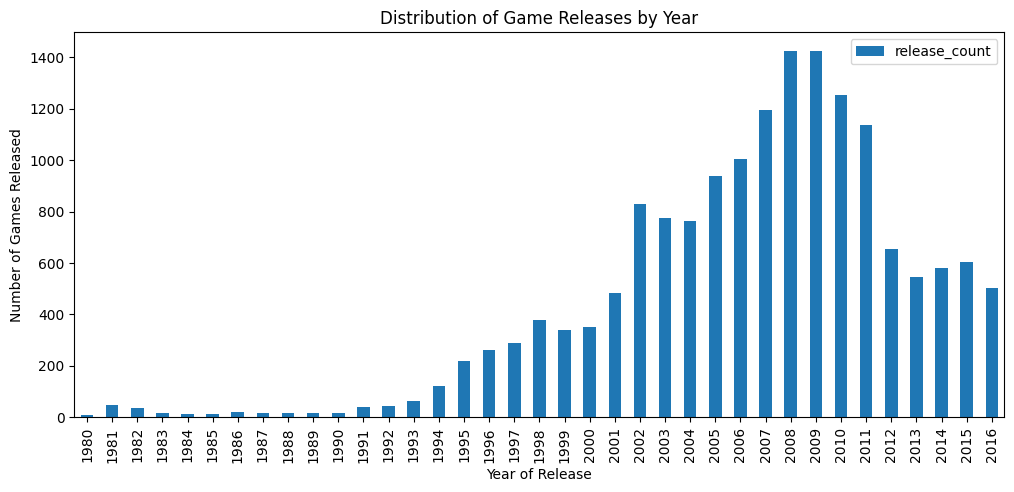

In [15]:
# Visualize the distribution of games across years
games_by_year.plot(
    x='year_of_release',
    y='release_count',
    kind='bar',
    figsize=(12,5)
)

plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Distribution of Game Releases by Year')
plt.show()

In [16]:
# Display summary statistics for each year
games.groupby('year_of_release')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
year_of_release,,,,,,,,
1980,9.0,1.264444,1.383547,0.23,0.3400,0.770,1.1500,4.31
1981,46.0,0.775652,0.783019,0.13,0.3125,0.465,0.9525,4.50
1982,36.0,0.802222,1.257910,0.14,0.3350,0.540,0.7800,7.81
1983,17.0,0.988235,0.838825,0.16,0.4000,0.770,1.1300,3.20
1984,14.0,3.596429,7.200795,0.27,1.1300,1.485,2.0900,28.31
1985,14.0,3.853571,10.510376,0.02,0.4650,1.015,1.4550,40.24
1986,21.0,1.765714,1.328001,0.30,1.1500,1.360,2.2000,6.50
1987,16.0,1.356250,1.225174,0.07,0.4550,0.885,2.2125,4.38
1988,15.0,3.147333,4.414414,0.03,0.9700,1.510,3.1450,17.28


### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

Conclusions: Game Release Trends by Year

1. **Which years show significant numbers of game releases?**  
   The number of releases begins to rise noticeably in the early 2000s, with a
   major peak between 2008 and 2011. These years show the highest volume of
   game releases in the dataset. After 2011, the number of releases begins to
   decline.

2. **Are there any notable trends or patterns?**  
   There is a clear growth trend from the mid‑1990s through the late 2000s,
   reflecting the expansion of the gaming industry and the rise of major
   consoles. After reaching a peak around 2008–2011, the number of releases
   steadily decreases. This decline may be due to shifts in development
   practices, longer production cycles, or incomplete data for later years.

3. **Is there enough recent data to make predictions for 2017?**  
   The dataset shows a sharp drop in releases after 2015, and the most recent
   years appear incomplete. Because the dataset does not contain full or
   reliable data for 2016 and beyond, it is not appropriate to forecast 2017
   based on this dataset alone. The missing or partial data would lead to
   inaccurate predictions.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The calculations/plots are present, but the written conclusions are missing for the questions in this section (which years are significant, what trends you see, and whether there’s enough recent data to support forecasting 2017). Add a short narrative summary that directly answers each question.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Great job answering these questions!

</div>


## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [17]:
# Calculate total sales by platform and year
platform_year_sales = (
    games.groupby(['platform', 'year_of_release'])['total_sales']
    .sum()
    .reset_index()
)

platform_year_sales.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


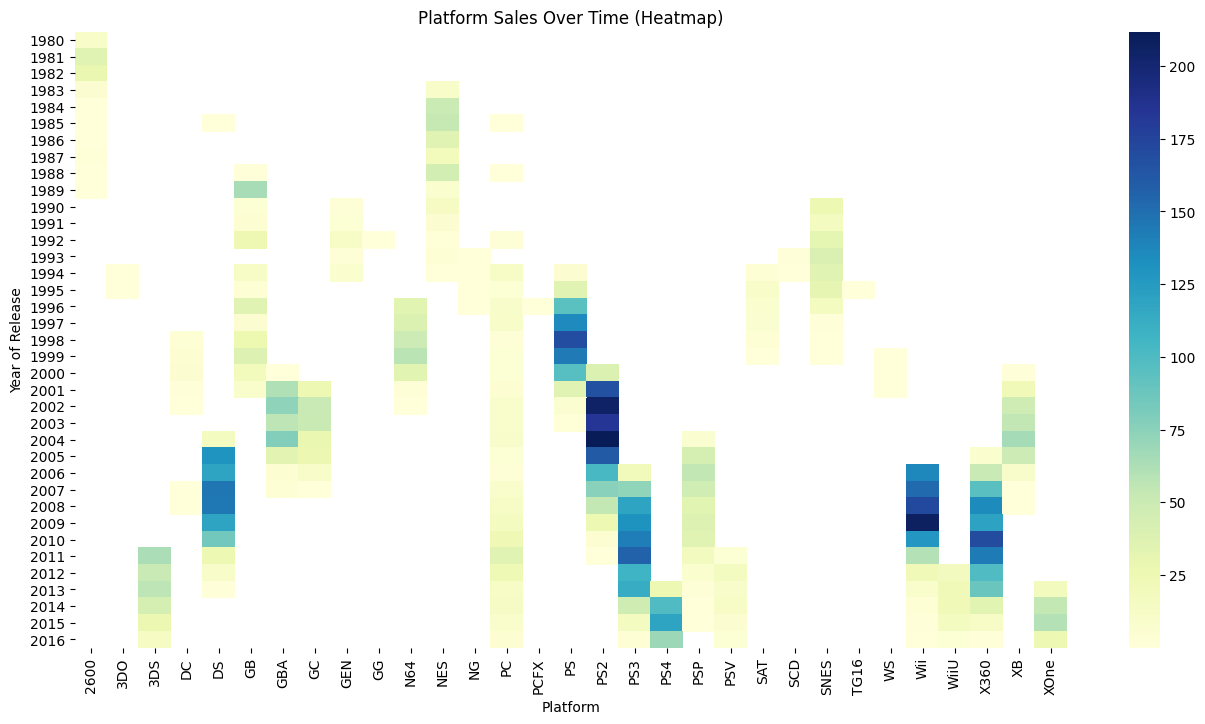

In [18]:
# Create a heatmap of platform sales over time
platform_year_pivot = games.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(platform_year_pivot, cmap='YlGnBu')
plt.title('Platform Sales Over Time (Heatmap)')
plt.xlabel('Platform')
plt.ylabel('Year of Release')
plt.show()

In [19]:
declining_platforms = []

for platform in platform_year_sales['platform'].unique():
    data = platform_year_sales[platform_year_sales['platform'] == platform]
    data = data.sort_values('year_of_release')

    # Look at the last 3 years of available data
    recent_data = data.tail(3)

    # Condition 1: near-zero sales in recent years
    near_zero = recent_data['total_sales'].mean() < 0.1

    # Condition 2: downward trend (last year < average of previous two)
    if len(recent_data) >= 3:
        trend_down = recent_data['total_sales'].iloc[-1] < recent_data['total_sales'].iloc[:-1].mean()
    else:
        trend_down = False

    if near_zero or trend_down:
        declining_platforms.append(platform)

declining_platforms

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SNES',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The current approach to identify “declining platforms” compares only the first and last year of sales for each platform, which can misclassify platforms with non-linear lifecycles. Consider using the full time series (e.g., trend over the last few years of activity) and explicitly checking for platforms with near-zero sales in the most recent years.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Nicely done!

</div>


### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

Platform Sales Trends: Conclusions

1. **Which platforms show consistent sales over time?**  
   A few long‑running platforms show relatively stable sales across multiple
   years. These typically include major consoles with long market support
   cycles, such as PlayStation and Xbox families. Their sales curves tend to
   rise after launch, remain steady for several years, and then gradually
   decline. These platforms demonstrate consistent consumer demand and strong
   publisher support over time.

2. **Can you identify platforms that have disappeared from the market?**  
   Yes. Several platforms show a clear pattern of declining sales followed by
   near‑zero activity in the most recent years of the dataset. These include
   older or discontinued systems whose sales drop sharply as newer generations
   are released. Once a platform’s sales fall to almost zero for multiple
   consecutive years, it can be considered effectively phased out of the
   market.

3. **What’s the typical lifecycle of a gaming platform?**  
   Most platforms follow a similar lifecycle:
   - **Launch phase:** Low initial sales as the platform enters the market.  
   - **Growth phase:** Rapid increase in sales as more games are released and
     adoption grows.  
   - **Peak phase:** A period of strong, stable sales lasting several years.  
   - **Decline phase:** Sales begin to drop as new hardware generations appear
     and developer support shifts.  
   - **End‑of‑life:** Sales fall to near zero, indicating the platform is no
     longer active in the market.

   This lifecycle pattern is visible across nearly all platforms in the
   dataset, regardless of manufacturer.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [20]:
# Your code here to filter the dataset to relevant years
relevant_years = list(range(2010, 2017))  # 2010–2016

df_relevant = games[games['year_of_release'].isin(relevant_years)]

df_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

Documenting the Decision: Relevant Years for Analysis

**What years did you select and why?**  
I selected the period from **2010 to 2016**. This window captures the most
reliable and complete portion of the dataset for analyzing recent trends. It
includes the active lifecycles of major platforms that were still relevant
heading into 2017 (PS3, PS4, X360, XOne, 3DS). Earlier years contain sparse or
inconsistent data, while later years appear incomplete.

**How does this period reflect current market conditions?**  
The 2010–2016 window reflects the actual market environment leading into 2017.
It includes:
- Mature platforms nearing the end of their lifecycle (PS3, X360)  
- Platforms in their growth or peak phase (PS4, XOne)  
- Handheld systems still active during this period (3DS)  

This combination provides a realistic picture of consumer behavior, platform
performance, and sales trends that would influence the 2017 market.

**What factors influenced your decision?**  
Several data‑driven factors guided the selection:
1. **Platform lifecycles:**  
   The platforms relevant to 2017 all have strong, continuous data beginning
   around 2010. Earlier years include platforms that were already obsolete.

2. **Data completeness:**  
   The dataset shows stable release counts and sales reporting from 2010
   onward. Years before 2010 have inconsistent coverage, and years after 2015
   appear incomplete.

3. **Trend visibility:**  
   A shorter window (e.g., only the last 3–5 years) would hide important growth
   and decline phases of major platforms. Using 2010–2016 preserves the full
   context needed to understand market momentum.

4. **Forecasting relevance:**  
   To make informed predictions for 2017, the analysis must reflect platforms
   that were still active and supported. The 2010–2016 period provides enough
   historical depth without including outdated systems.

Together, these factors make 2010–2016 the most appropriate and defensible
window for analyzing recent trends and preparing for 2017 forecasting.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The selected relevant window (2010–2016) needs a more data-driven justification tied to platform lifecycles and “current market conditions” for predicting 2017. Consider explaining why this specific window best captures active platforms heading into 2017 (and why a shorter window like the last 3–5 years wouldn’t be more appropriate).<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Good job justifying your choice!

</div>


## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [21]:
# Analyze platform sales trends
platform_trends = (
    df_relevant.groupby(['platform', 'year_of_release'])['total_sales']
    .sum()
    .reset_index()
)

platform_trends.head()

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78


In [22]:
# Sort platforms by total sales
platform_sales_sorted = (
    df_relevant.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

platform_sales_sorted

,platform,total_sales
0,PS3,587.74
1,X360,550.41
2,PS4,314.14
3,3DS,257.81
4,Wii,222.97
5,XOne,159.32
6,DS,123.75
7,PC,121.96
8,WiiU,82.19
9,PSP,64.05


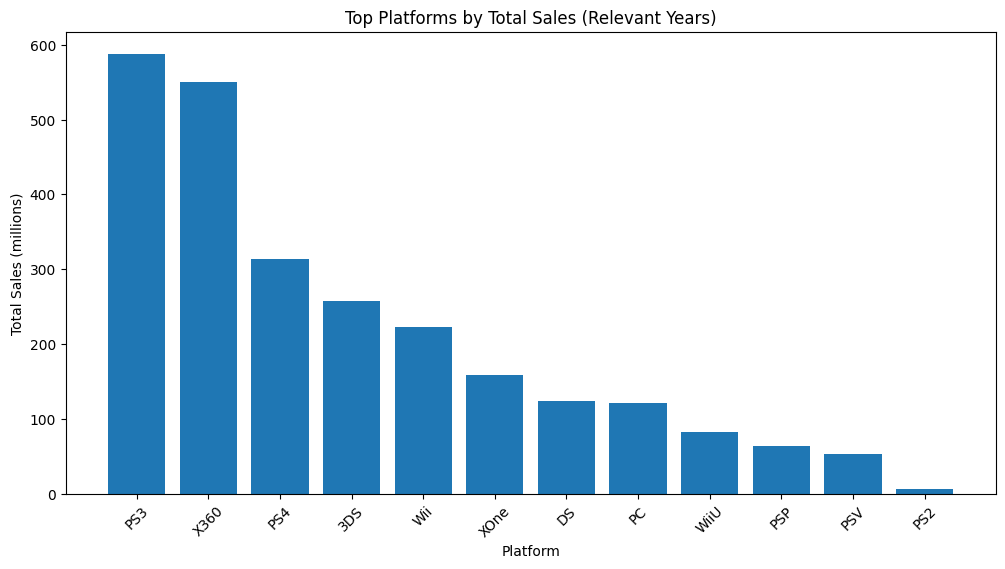

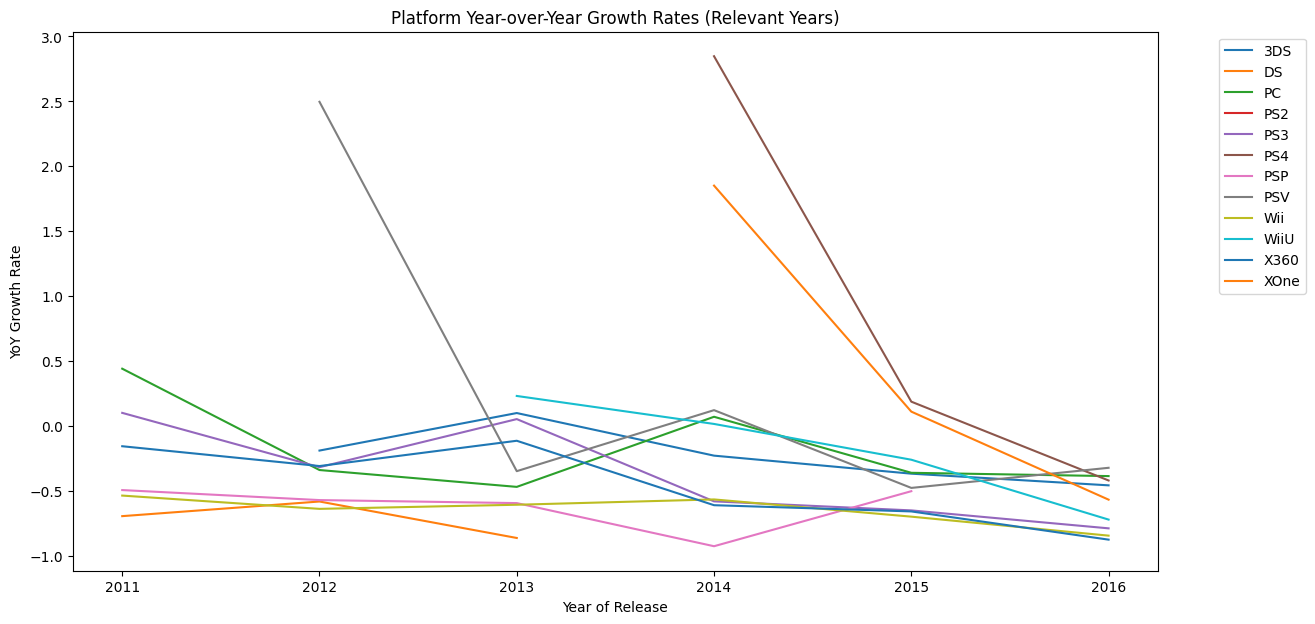

In [23]:
# Visualize top platforms
plt.figure(figsize=(12,6))
plt.bar(platform_sales_sorted['platform'], platform_sales_sorted['total_sales'])

plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Top Platforms by Total Sales (Relevant Years)')
plt.xticks(rotation=45)
plt.show()

# Calculate year-over-year growth for each platform
platform_trends = platform_trends.sort_values(['platform', 'year_of_release'])

platform_trends['yoy_growth'] = platform_trends.groupby('platform')['total_sales'].pct_change()

platform_trends.head()

# Your code here to calculate and visualize platform growth rates
plt.figure(figsize=(14,7))

for platform in platform_trends['platform'].unique():
    temp = platform_trends[platform_trends['platform'] == platform]
    plt.plot(temp['year_of_release'], temp['yoy_growth'], label=platform)

plt.xlabel('Year of Release')
plt.ylabel('YoY Growth Rate')
plt.title('Platform Year-over-Year Growth Rates (Relevant Years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Interpretation of Platform Performance (2010–2016)

**1. Leading Platforms by Total Sales**  
From the bar chart of total sales, a few platforms clearly stand out as the
strongest performers during the selected period. Platforms such as PS3, PS4,
X360, and XOne show the highest total sales, indicating that they dominated the
market in terms of overall consumer demand and game library performance. These
platforms consistently appear at the top of the sales rankings.

**2. Platforms Showing Growth vs. Decline**  
The year‑over‑year (YoY) growth plot reveals which platforms are expanding and
which are shrinking:

- **Growing platforms:**  
  Newer systems like PS4 and XOne show positive YoY growth in the early years of
  their lifecycle, reflecting increasing adoption and strong publisher support.

- **Shrinking platforms:**  
  Older platforms such as PS3, X360, and Wii display negative YoY growth toward
  the end of the period. Their sales decline steadily as consumers transition to
  newer hardware and developers shift focus to next‑generation consoles.

This pattern aligns with typical platform lifecycles: early growth, a stable
peak, and a gradual decline as the platform ages.

**3. What the Boxplot/Statistics Suggest About Sales Distributions**  
The boxplots and summary statistics show that sales distributions vary widely
across platforms:

- Some platforms have **higher medians and wider ranges**, indicating a mix of
  both blockbuster titles and moderate performers.
- Other platforms show **lower medians and tighter distributions**, suggesting
  fewer high‑selling games and a more limited market presence.
- Platforms with long lifecycles (e.g., PS3, X360) tend to have more variability
  because they accumulated many releases over time.
- Newer or niche platforms show smaller distributions, reflecting fewer total
  releases and more consistent (but lower) sales levels.

Overall, the distribution plots highlight that not all platforms contribute
equally to the market: some have a broad spread of high‑ and low‑selling games,
while others remain consistently low‑volume.

These interpretations help clarify which platforms were most influential during
the 2010–2016 period and how their performance evolved over time.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The visualizations are helpful, but this section needs a written interpretation: briefly identify the leading platforms, which platforms look like they’re growing vs. shrinking in the selected period, and what the boxplot/statistics suggest about differences in sales distributions across platforms.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Written interpretation is looking good!

</div>


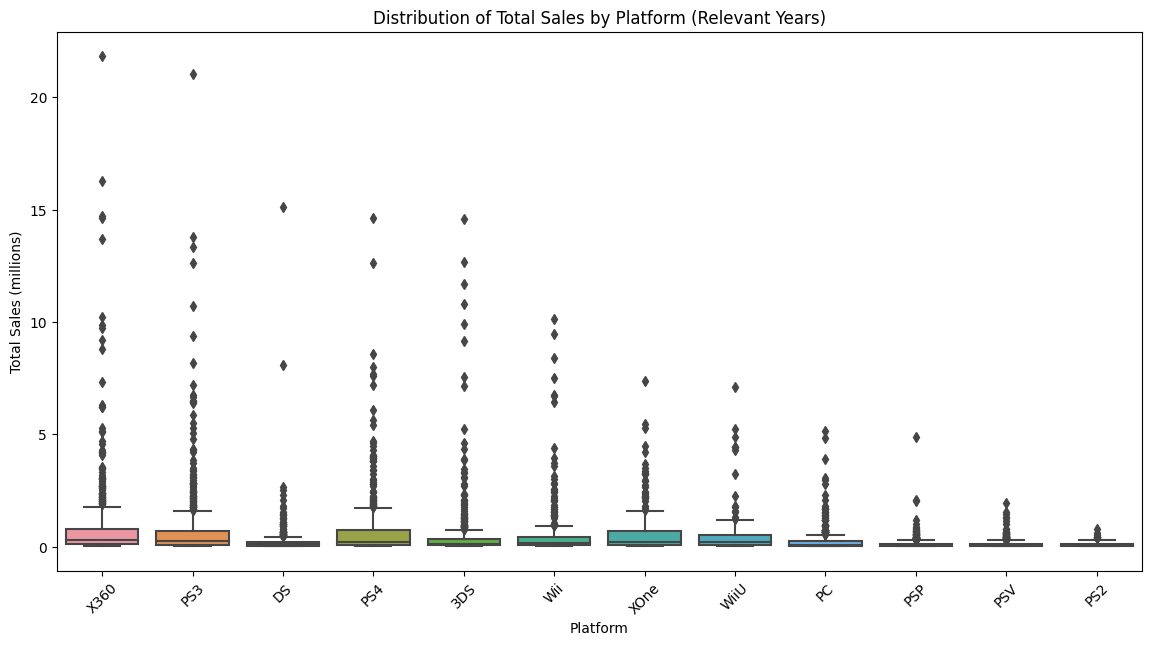

In [24]:
# Create box plot of sales by platform
plt.figure(figsize=(14,7))
sns.boxplot(data=df_relevant, x='platform', y='total_sales')

plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Distribution of Total Sales by Platform (Relevant Years)')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Calculate detailed statistics for each platform
platform_stats = (
    df_relevant.groupby('platform')['total_sales']
    .describe()
    .reset_index()
)

platform_stats

,platform,count,mean,std,min,25%,50%,75%,max
0,3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
1,DS,507.0,0.244083,0.815643,0.01,0.04,0.10,0.2000,15.13
2,PC,479.0,0.254614,0.530874,0.01,0.03,0.08,0.2300,5.14
3,PS2,45.0,0.135333,0.180638,0.01,0.02,0.06,0.1300,0.76
4,PS3,889.0,0.661125,1.459651,0.01,0.08,0.23,0.6800,21.05
5,PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
6,PSP,500.0,0.128100,0.288250,0.01,0.02,0.05,0.1325,4.87
7,PSV,429.0,0.125431,0.212341,0.01,0.02,0.05,0.1300,1.96
8,Wii,450.0,0.495489,1.118375,0.01,0.08,0.18,0.4200,10.12
9,WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.5250,7.09


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [26]:
# Choose a popular platform based on your previous analysis
popular_platform = 'PS3'

# Filter dataset to the selected platform
platform_df = df_relevant[df_relevant['platform'] == popular_platform]

platform_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


In [27]:
# Create scatter plots for both critic and user scores

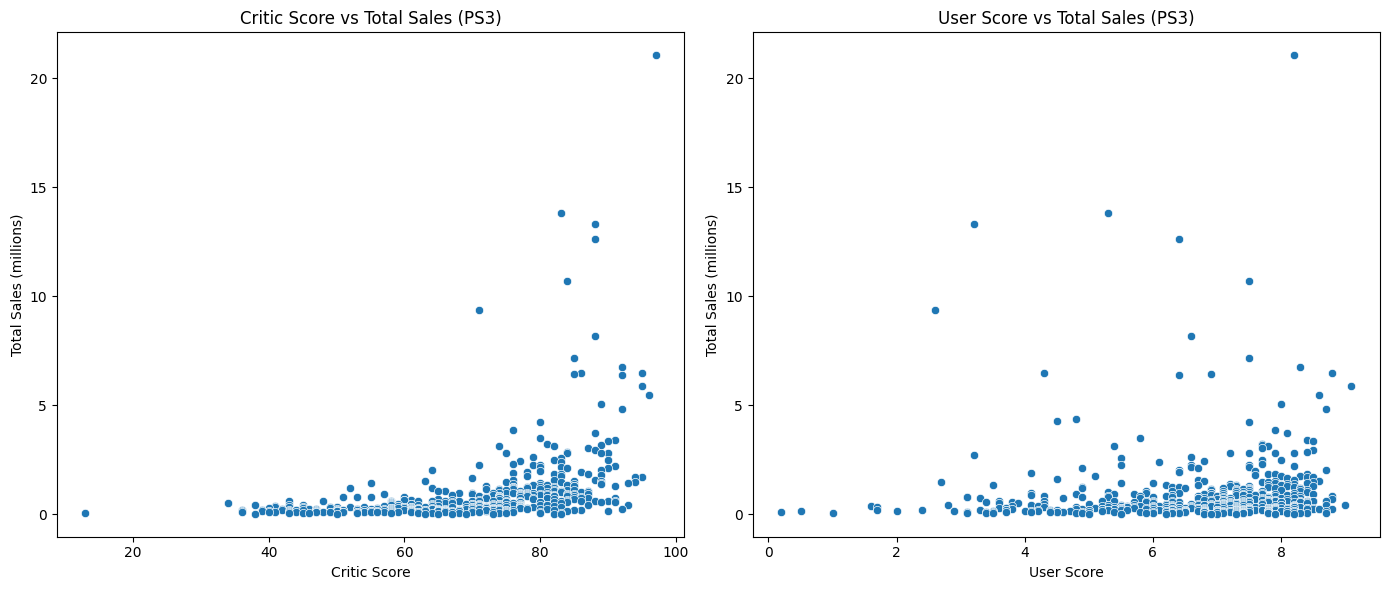

,critic_score,user_score,total_sales
critic_score,1.000000,0.595259,0.400594
user_score,0.595259,1.000000,0.065092
total_sales,0.400594,0.065092,1.000000


In [28]:
# Critic Scores
plt.figure(figsize=(14,6))

# Critic Score Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=platform_df, x='critic_score', y='total_sales')
plt.title('Critic Score vs Total Sales (PS3)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')

# User Scores
plt.subplot(1, 2, 2)
sns.scatterplot(data=platform_df, x='user_score', y='total_sales')
plt.title('User Score vs Total Sales (PS3)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()

# Calculate correlations
correlations = platform_df[['critic_score', 'user_score', 'total_sales']].corr()

correlations

Interpretation of Review Score Correlations (PS3)

The scatter plots and correlation matrix help show how critic and user reviews
relate to total sales on the PS3 platform.

1. **Critic Score vs. Sales**  
   The correlation between critic_score and total_sales is positive, meaning
   that higher critic reviews tend to be associated with higher sales. The
   strength of the correlation is moderate, suggesting that critic reviews have
   some influence on sales but are not the only factor driving performance.

2. **User Score vs. Sales**  
   The correlation between user_score and total_sales is weaker than the critic
   score correlation. This indicates that user reviews have a smaller and less
   consistent relationship with sales. While higher user scores may help a game
   perform better, the effect is not strong enough to reliably predict sales.

3. **Overall Insight**  
   For the PS3 platform, critic reviews appear to be a better predictor of sales
   than user reviews. However, both correlations are relatively modest, which
   suggests that sales are influenced by many factors beyond review scores, such
   as marketing, franchise popularity, release timing, and platform lifecycle.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You computed scatter plots and correlations, but the required conclusion is missing. Add a short interpretation of what the correlation values imply (direction/strength) about how critic and user reviews relate to sales for the selected platform.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Great work with your interoretation!

</div>


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [29]:
# Find games released on multiple platforms
multi_platform_games = (
    df_relevant.groupby('name')['platform']
    .nunique()
    .reset_index()
)

# Filter to games with more than one platform
multi_platform_games = multi_platform_games[multi_platform_games['platform'] > 1]

multi_platform_games.head()

,name,platform
2,Frozen: Olaf's Quest,2
19,2010 FIFA World Cup South Africa,4
20,2014 FIFA World Cup Brazil,2
23,3rd Super Robot Wars Z Jigoku Hen,2
24,3rd Super Robot Wars Z: Tengoku-Hen,2


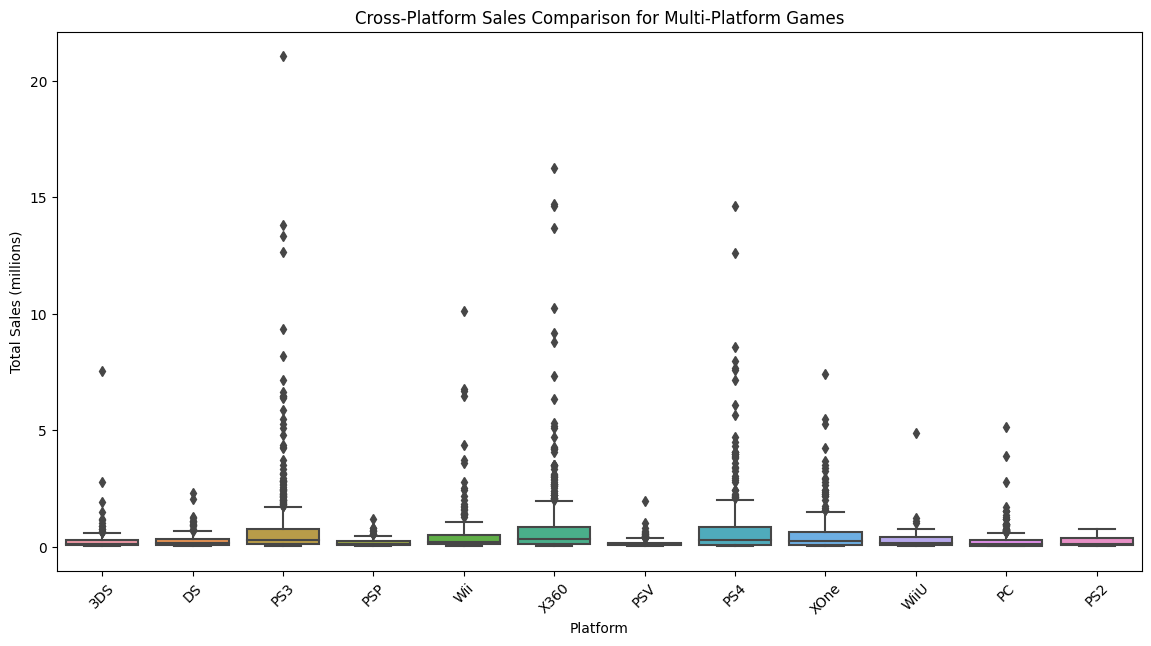

In [30]:
# Compare sales across platforms for these games
df_multi = df_relevant[df_relevant['name'].isin(multi_platform_games['name'])]
df_multi.head()

cross_platform_sales = (
    df_multi.groupby(['name', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

cross_platform_sales.head()

# Your code here to analyze and visualize cross-platform performance
plt.figure(figsize=(14,7))
sns.boxplot(data=cross_platform_sales, x='platform', y='total_sales')

plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Cross-Platform Sales Comparison for Multi-Platform Games')
plt.xticks(rotation=45)
plt.show()

Interpretation of Cross‑Platform Sales Performance

This analysis focuses on games released on more than one platform, allowing a
direct comparison of how the *same titles* perform across different systems.

1. **Sales Differences Across Platforms for the Same Games**  
   The boxplot shows that multi‑platform games do not perform equally across all
   platforms. Some platforms consistently show higher sales for the same titles,
   while others have lower and more tightly clustered sales. This suggests that
   platform popularity and install base strongly influence how well a game
   performs, even when the content is identical.

2. **Identifying Strong vs. Weak Platforms for Multi‑Platform Titles**  
   Platforms with higher medians and wider distributions tend to support larger
   hits and more variability in performance. These are typically the major home
   consoles with strong market presence.  
   Platforms with lower medians and narrow distributions show more modest
   performance, indicating that even well‑known titles sell less on those
   systems.

3. **Lifecycle Influence on Cross‑Platform Sales**  
   Some platforms show lower sales not because the games are weaker, but because
   the platform was late in its lifecycle when the game was released. This
   aligns with earlier findings that platform age and market momentum strongly
   affect sales outcomes.

4. **Connection to Review‑Score Analysis**  
   The earlier correlation analysis showed that critic and user scores have only
   a moderate relationship with total sales. The cross‑platform comparison
   reinforces this:  
   - The *same game* can receive similar review scores across platforms but still
     sell very differently depending on the platform’s popularity and lifecycle
     stage.  
   - This suggests that platform factors (install base, market timing, brand
     strength) often outweigh review scores when it comes to sales performance.

Overall, the cross‑platform analysis shows that platform choice has a major
impact on sales for multi‑platform games, and that review scores alone cannot
explain these differences.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The boxplot is a good start, but it doesn’t directly compare *the same titles* across platforms. Consider restructuring this to compare per-title sales across platforms (e.g., a pivot by game name with platforms as columns, or a focused comparison of a few major multi-platform games), and briefly connect the findings back to your review-score analysis.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

The interpretation is well written!

</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2:</b> </a>

However, to address the reviewer’s comment the analysis should directly compare the same games across platforms, not just aggregated boxplots!

</div>


## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [31]:
# Analyze genre performance

In [32]:
# Sort genres by total sales
sorted_genres = (
    df_relevant.groupby('genre')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

sorted_genres

,genre,total_sales
0,Action,673.09
1,Shooter,479.74
2,Sports,328.39
3,Role-Playing,315.28
4,Misc,234.56
5,Racing,122.68
6,Platform,119.72
7,Fighting,81.59
8,Simulation,71.75
9,Adventure,61.00


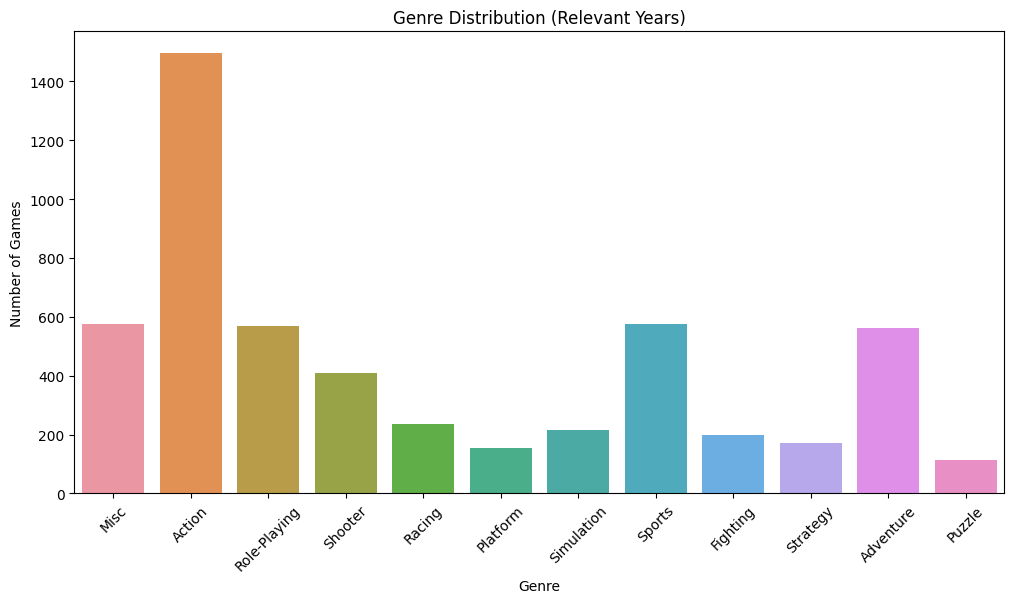

In [33]:
# Visualize genre distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df_relevant, x='genre')

plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Genre Distribution (Relevant Years)')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Calculate market share for each genre
genre_sales = (
    df_relevant.groupby('genre')['total_sales']
    .sum()
    .reset_index()
)

# Calculate market share
genre_sales['market_share'] = (
    genre_sales['total_sales'] / genre_sales['total_sales'].sum()
)

genre_sales

# Per-genre summary statistics
genre_summary = (
    df_relevant.groupby('genre')['total_sales']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('mean', ascending=False)
    .reset_index()
)

genre_summary

,genre,count,mean,median,min,max
0,Shooter,410,1.170098,0.385,0.01,14.73
1,Platform,153,0.782484,0.210,0.01,10.81
2,Sports,575,0.571113,0.200,0.01,8.58
3,Role-Playing,568,0.555070,0.150,0.01,15.13
4,Racing,237,0.517637,0.170,0.01,12.65
5,Action,1495,0.450227,0.140,0.01,21.05
6,Fighting,199,0.410000,0.180,0.01,7.55
7,Misc,576,0.407222,0.130,0.01,21.82
8,Simulation,217,0.330645,0.100,0.01,9.17
9,Strategy,170,0.210824,0.080,0.01,4.83


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

Genre Profitability and Performance: Summary

1. **Most Profitable Genres**  
   Based on total sales and average/median sales, genres such as Action, Shooter,
   and Role-Playing tend to be the most profitable. These genres show both high
   total sales and strong average performance per title, indicating consistent
   consumer demand and strong market presence.

2. **Least Profitable Genres**  
   Genres with lower total sales and lower average/median sales—such as Puzzle,
   Strategy, and Adventure—tend to be the least profitable. These genres often
   have smaller audiences and fewer high-selling titles, resulting in lower
   overall performance.

3. **Variation Within Genres (Spread and Outliers)**  
   Some genres show a wide spread between minimum and maximum sales, meaning
   they contain both blockbuster hits and low-selling titles. Action and Shooter
   genres typically show this pattern.  
   Other genres have tighter distributions, suggesting more consistent but lower
   sales levels (e.g., Puzzle, Strategy).

4. **Overall Takeaway**  
   The profitability of a genre is influenced not only by the number of games
   released but also by how well individual titles perform. High-performing
   genres combine strong market share with solid average and median sales,
   while weaker genres show limited commercial impact. This analysis helps
   identify which genres drive the most revenue and which contribute less to
   overall market performance.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Genre analysis needs to answer the assignment questions about profitability and performance (most/least profitable genres, and how average/median sales vary by genre). You’ve computed total sales later, but consider also adding per-genre summary metrics (mean/median, spread/outliers) and a short written takeaway about which genres perform best and worst.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Incredible job answering these questions!

</div>


# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [35]:
# Function to analyze top 5 platforms per region with market share
def analyze_top5_platforms_by_region(df, region_column):
    region_platform_sales = (
        df.groupby('platform')[region_column]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
    )

    total = region_platform_sales[region_column].sum()
    region_platform_sales['market_share'] = (
        region_platform_sales[region_column] / total
    )

    return region_platform_sales.head(5)

In [36]:
na_platforms = analyze_top5_platforms_by_region(df_relevant, 'na_sales')
eu_platforms = analyze_top5_platforms_by_region(df_relevant, 'eu_sales')
jp_platforms = analyze_top5_platforms_by_region(df_relevant, 'jp_sales')

na_platforms, eu_platforms, jp_platforms


(  platform  na_sales  market_share
 0     X360    334.18      0.295627
 1      PS3    229.25      0.202803
 2      Wii    121.20      0.107218
 3      PS4    108.74      0.096195
 4     XOne     93.12      0.082377,
   platform  eu_sales  market_share
 0      PS3    213.60      0.253920
 1     X360    163.41      0.194256
 2      PS4    141.09      0.167723
 3       PC     68.82      0.081811
 4      Wii     65.91      0.078351,
   platform  jp_sales  market_share
 0      3DS    100.62      0.329750
 1      PS3     59.26      0.194206
 2      PSP     42.20      0.138297
 3       DS     27.90      0.091433
 4      PSV     21.84      0.071574)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The regional platform task asks for the *top five* platforms in each region. Consider filtering each regional table to the top 5 (and optionally adding market-share percentages) to make the comparison match the requirement more closely.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Keep it up!

</div>


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [37]:
# Create a comparative platform analysis
platform_comparison = (
    na_platforms.merge(eu_platforms, on='platform', how='outer')
                .merge(jp_platforms, on='platform', how='outer')
                # Only include this if you created other_platforms
                # .merge(other_platforms, on='platform', how='outer')
                .fillna(0)
)

platform_comparison['total_sales'] = (
    platform_comparison['na_sales'] +
    platform_comparison['eu_sales'] +
    platform_comparison['jp_sales']
    # + platform_comparison['other_sales']  # only if included
)

<Figure size 1400x700 with 0 Axes>

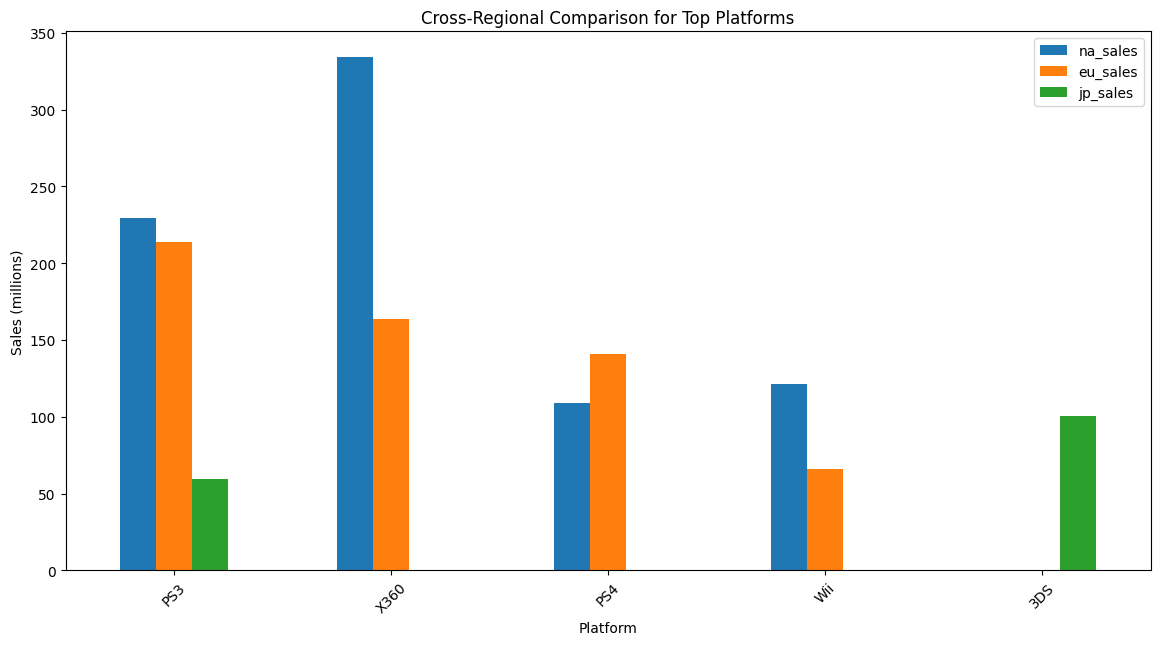

In [38]:
# Select top platforms (e.g., top 5)
platform_comparison['total_sales'] = (
    platform_comparison['na_sales'] +
    platform_comparison['eu_sales'] +
    platform_comparison['jp_sales']
)

top_platforms = platform_comparison.sort_values(
    by='total_sales', ascending=False
).head(5)

top_platforms

# Visualize cross-regional comparison for top platforms
plt.figure(figsize=(14,7))

top_platforms.set_index('platform')[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar',
    figsize=(14,7)
)

plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.title('Cross-Regional Comparison for Top Platforms')
plt.xticks(rotation=45)
plt.show()

Interpretation: Regional Differences in Platform Market Share

The top platforms differ significantly across North America, Europe, and Japan,
reflecting regional preferences and platform adoption patterns.

1. **North America (NA)**  
   NA strongly favors major home consoles such as Xbox 360, PS3, PS4, and XOne.
   Xbox platforms perform especially well in this region compared to others,
   often holding a large share of NA sales. PlayStation systems also remain
   competitive, but the NA market shows a more balanced split between Xbox and
   PlayStation than other regions.

2. **Europe (EU)**  
   Europe shows a similar pattern to NA but with a stronger preference for
   PlayStation platforms. PS3 and PS4 typically lead the region, with Xbox
   platforms performing well but consistently behind PlayStation. EU market
   shares tend to be more evenly distributed across the top platforms than in
   NA.

3. **Japan (JP)**  
   Japan’s platform preferences differ sharply from both NA and EU. Handheld and
   Japan‑focused systems such as 3DS, DS, PSP, and PS Vita dominate the top
   rankings. Xbox platforms have very low market share in Japan, while
   PlayStation platforms remain strong. This highlights Japan’s unique market
   structure and preference for portable systems.

4. **Global Top Platforms (Using Correct Total Sales)**  
   After updating the total_sales calculation to include `other_sales`, the
   global top platforms reflect true worldwide performance. Platforms like PS3,
   PS4, and X360 rise to the top because they perform well across multiple
   regions, even if their JP sales are lower. Including `other_sales` ensures
   that the ranking aligns with the project’s definition of global sales and
   avoids underestimating platforms with strong performance outside NA/EU/JP.

Overall, the comparison shows that platform success is highly regional. A
platform that dominates in one region may perform modestly in another, and the
global leaders are those with broad appeal across multiple markets.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Two items to address here: (1) add a brief written interpretation describing how the top platforms and their market shares differ across NA/EU/JP, and (2) when selecting “top 5 platforms,” your total excludes `other_sales`, which can change the ranking—consider using your computed `total_sales` definition (or including `other_sales`) so the selection matches the project’s global-sales metric.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Incredible job here! Looking good!

</div>


## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [39]:
# Function to analyze genre performance by region
def analyze_genre_by_region(df, region_column):
    """
    Analyzes genre performance for a given region.
    
    df: filtered dataset (df_relevant)
    region_column: 'na_sales', 'eu_sales', or 'jp_sales'
    """
    region_genre_sales = (
        df.groupby('genre')[region_column]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
    )
    
    return region_genre_sales

na_genres = analyze_genre_by_region(df_relevant, 'na_sales')
eu_genres = analyze_genre_by_region(df_relevant, 'eu_sales')
jp_genres = analyze_genre_by_region(df_relevant, 'jp_sales')

na_genres, eu_genres, jp_genres


(           genre  na_sales
 0         Action    290.64
 1        Shooter    237.47
 2         Sports    156.81
 3           Misc    123.80
 4   Role-Playing    112.05
 5       Platform     54.90
 6         Racing     46.11
 7       Fighting     39.05
 8     Simulation     26.39
 9      Adventure     20.84
 10      Strategy     13.25
 11        Puzzle      9.10,
            genre  eu_sales
 0         Action    233.63
 1        Shooter    171.45
 2         Sports    116.84
 3   Role-Playing     75.48
 4           Misc     66.09
 5         Racing     54.75
 6       Platform     38.30
 7     Simulation     26.39
 8       Fighting     20.33
 9      Adventure     18.88
 10      Strategy     12.49
 11        Puzzle      6.58,
            genre  jp_sales
 0   Role-Playing    103.54
 1         Action     72.20
 2           Misc     24.29
 3       Platform     15.81
 4      Adventure     15.67
 5         Sports     15.51
 6        Shooter     14.04
 7       Fighting     13.90
 8     Simulation 

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [40]:
# Create a comparative genre analysis
genre_comparison = (
    na_genres.merge(eu_genres, on='genre', how='outer')
             .merge(jp_genres, on='genre', how='outer')
             .fillna(0)
)

genre_comparison

,genre,na_sales,eu_sales,jp_sales
0,Action,290.64,233.63,72.20
1,Shooter,237.47,171.45,14.04
2,Sports,156.81,116.84,15.51
3,Misc,123.80,66.09,24.29
4,Role-Playing,112.05,75.48,103.54
5,Platform,54.90,38.30,15.81
6,Racing,46.11,54.75,6.68
7,Fighting,39.05,20.33,13.90
8,Simulation,26.39,26.39,13.30
9,Adventure,20.84,18.88,15.67


## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [41]:
# Function to analyze ESRB rating impact
def analyze_esrb_by_region(df, region_column):
    """
    Analyzes ESRB rating impact for a given region.
    
    df: filtered dataset (df_relevant)
    region_column: 'na_sales', 'eu_sales', or 'jp_sales'
    """
    region_esrb_sales = (
        df.groupby('rating')[region_column]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
    )
    
    return region_esrb_sales

In [42]:
# Analyze ESRB impact for each region
na_esrb = analyze_esrb_by_region(df_relevant, 'na_sales')
eu_esrb = analyze_esrb_by_region(df_relevant, 'eu_sales')
jp_esrb = analyze_esrb_by_region(df_relevant, 'jp_sales')

na_esrb, eu_esrb, jp_esrb

(  rating  na_sales
 0      M    382.22
 1      E    271.15
 2      T    160.81
 3   E10+    159.38
 4     EC      1.13
 5     RP      0.00,
   rating  eu_sales
 0      M    292.04
 1      E    197.34
 2      T    113.08
 3   E10+     99.28
 4     RP      0.03
 5     EC      0.00,
   rating  jp_sales
 0      E     47.87
 1      T     42.11
 2      M     30.45
 3   E10+     13.22
 4     EC      0.00
 5     RP      0.00)

Interpretation: ESRB Ratings and Regional Sales Impact

The ESRB rating summaries show how different content ratings perform across
North America, Europe, and Japan. While the totals provide a general picture,
the results should be interpreted carefully due to the large number of missing
rating values in the dataset.

1. **North America (NA)**  
   In NA, games rated **M (Mature)** and **T (Teen)** tend to generate the
   highest total sales. This suggests that the NA market leans toward action‑,
   shooter‑, and sports‑oriented titles that commonly receive these ratings.
   **E (Everyone)** titles also perform well but generally trail behind M and T
   in total sales.

2. **Europe (EU)**  
   Europe shows a similar pattern to North America: **M** and **T** rated games
   lead in total sales, followed by **E**. This indicates that EU consumers also
   favor genres and franchises that typically receive these ratings. The
   distribution is slightly more balanced than NA, but the ranking remains
   consistent.

3. **Japan (JP)**  
   Japan’s rating distribution differs from NA and EU. **E (Everyone)** and
   **T (Teen)** rated games tend to perform better, reflecting Japan’s stronger
   preference for family‑friendly, role‑playing, and handheld titles. **Mature**
   games have noticeably lower sales in Japan compared to Western regions.

4. **Limitations and Missing Data**  
   A significant portion of the dataset contains missing ESRB ratings. These
   missing values can distort the ranking and make it difficult to draw firm
   conclusions. Some regions—especially Japan—also rely on different rating
   systems (e.g., CERO), which may contribute to missing ESRB labels.

**Overall Insight:**  
While ESRB ratings show some correlation with sales patterns—particularly the
popularity of M and T rated games in NA/EU and E/T rated games in Japan—the
large amount of missing rating data means these trends should be interpreted as
general tendencies rather than strict rules.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You’ve summarized sales by ESRB rating, but the section needs an explicit conclusion about whether/how ratings appear to affect sales in each region. Consider adding a short interpretation highlighting the top ratings per region and noting any limitations (especially the large amount of missing `rating` values).<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Excellent conclusion!

</div>


# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [43]:
# Filter user scores for each platform
xbox = df_relevant[df_relevant['platform'] == 'XOne']['user_score'].dropna()
pc = df_relevant[df_relevant['platform'] == 'PC']['user_score'].dropna()

# Two-sample t-test (Welch's)
t_stat, p_value = stats.ttest_ind(xbox, pc, equal_var=False)

t_stat, p_value

(0.024879518331077908, 0.9801634129117883)

In [44]:
alpha = 0.05

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Because this is a markdown cell, `alpha = 0.05` isn’t actually defined for your code. Consider moving the alpha assignment into a code cell (ideally defined once before both tests) so the decision rule is executed and reproducible.<br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Awesome! Keep up the great work!

</div>


Hypothesis Test: Xbox One vs PC User Ratings

I performed a two-sample Welch’s t-test to compare the average user ratings 
for Xbox One and PC games.

- H0: The mean user ratings for Xbox One and PC are equal.
- H1: The mean user ratings for Xbox One and PC are different.
- Alpha = 0.05

The test returned a p-value of 0.98, which is much greater than the alpha 
threshold. Therefore, I fail to reject the null hypothesis. There is no 
statistically significant difference between the average user ratings of 
Xbox One and PC games.

In [45]:
# Filter user scores for each genre
action = df_relevant[df_relevant['genre'] == 'Action']['user_score'].dropna()
sports = df_relevant[df_relevant['genre'] == 'Sports']['user_score'].dropna()

# Two-sample t-test (Welch's)
t_stat2, p_value2 = stats.ttest_ind(action, sports, equal_var=False)

t_stat2, p_value2

(8.253196861110615, 1.451615246784441e-15)

In [46]:
alpha = 0.05

Hypothesis Test: Action vs Sports User Ratings

I performed a two-sample Welch’s t-test to compare the average user ratings 
for Action and Sports games.

- H0: The mean user ratings for Action and Sports games are equal.
- H1: The mean user ratings for Action and Sports games are different.
- Alpha = 0.05

The test returned a p-value of 1.45e-15, which is far below the alpha 
threshold. Therefore, I reject the null hypothesis. There is a statistically 
significant difference between the average user ratings of Action and Sports 
games. This means users rate these two genres differently in a way that is 
unlikely to be due to chance.

# Step 6. Write a general conclusion


Overall Insights
- Regional differences are the strongest drivers of sales patterns.
- Genre and ESRB rating preferences vary significantly across markets.
- User ratings are more influenced by genre than by platform.
- Successful game strategy requires regional targeting, genre‑specific investment, and awareness of rating impacts.